In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.linear_model import Ridge
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from pandas import DataFrame
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('..\Initial_data\K5F5\K5F5_cor.csv', ";")
df

TypeError: read_csv() takes 1 positional argument but 2 were given

In [ ]:
corrmat = df.corr()
fig,ax = plt.subplots(figsize=(50,50))
sns.set(font_scale=1.25)
sns.heatmap(corrmat, annot=True, annot_kws={'size':25}, square=True)

In [4]:
df = pd.read_csv('..\Initial_data\K5F5\K5F5.csv')
df

,K5LCV1I.PV;K5F5.PV
0,30.77729;21.12289
1,33.47161;21.20488
2,31.715;21.2578
3,30.9076;21.27381
4,33.06693;21.28943
...,...
39217,56.69094;40.41797
39218,57.72594;40.42391
39219,55.37844;40.6457
39220,56.32594;40.88482


In [5]:
df=df.dropna()
df=df.round(2)
df=df.drop_duplicates(["K5F5.PV"])
df=df.drop_duplicates(["K5LCV1I.PV"])
df

KeyError: Index(['K5F5.PV'], dtype='object')

In [ ]:
y = df.drop(['K5LCV1I.PV'], axis=1)
x = df.drop(['K5F5.PV'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 25)
task = np.linspace(0, 100, 100)[:, np.newaxis] # Точки для предсказания

In [ ]:
plt.plot(x, y, label = 'тренировочные точки') 
plt.legend(loc='upper left') 
plt.show()

In [ ]:
lr = LinearRegression() # Линейная регрессия
lr.fit(X_train, y_train) # Обучим линейную регрессию
F5 = lr.predict(task) # Предсказываем y для линейной регрессии
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, F5, label = 'Линейная') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(lr, X_test, y_test, cv=2)

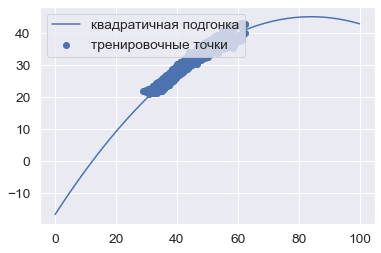

array([0.93383064, 0.93773224])

In [31]:
pr = LinearRegression() # Линейная регрессия
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X_train)       # Преобразуем данные
pr.fit(X_quad, y_train) # Обучаем полиномиальную регрессию
y_pr = pr.predict(quadratic.fit_transform(task)) # Предсказываем y для полиномиальной регрессии

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr, X_test, y_test, cv=2)

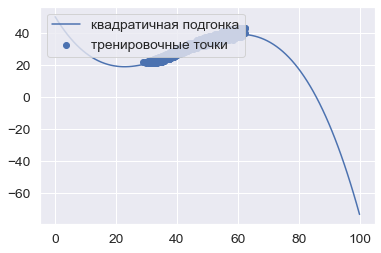

array([0.93383064, 0.93773224])

In [33]:
pr_3 = LinearRegression()
cube = PolynomialFeatures(degree=3)
X_cub = cube.fit_transform(X_train)   
pr_3.fit(X_cub, y_train)
y_pr = pr_3.predict(cube.fit_transform(task))
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr_3, X_test, y_test, cv=2)

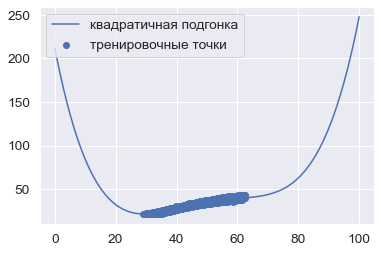

array([0.93383064, 0.93773224])

In [42]:
pr_4 = LinearRegression()
Fig = PolynomialFeatures(degree=4)
X_15 = Fig.fit_transform(X_train)   
pr_4.fit(X_15, y_train)
y_pr_4 = pr_4.predict(Fig.fit_transform(task))

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr_4, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr_4, X_test, y_test, cv=2)

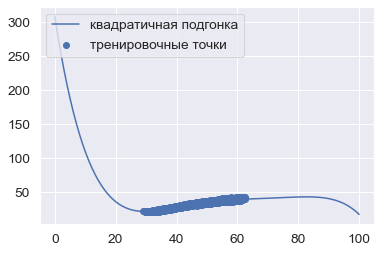

array([0.93383064, 0.93773224])

In [43]:
pr_5 = LinearRegression()
Fig = PolynomialFeatures(degree=5)
X_5 = Fig.fit_transform(X_train)   
pr_5.fit(X_5, y_train)
y_pr_5 = pr_5.predict(Fig.fit_transform(task))

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr_5, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr_5, X_test, y_test, cv=2)

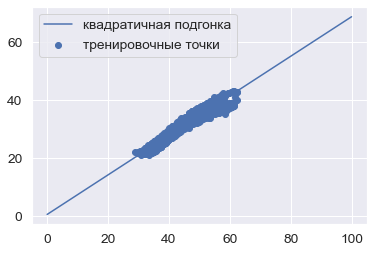

0.9362728267595473

In [49]:
lasso = MultiTaskLassoCV(cv=5, random_state=10).fit(x, y)
lasso.score(x, y)
clf = Ridge(alpha=0.5)
clf.fit(x, y)
y_pr=clf.predict(task)
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
clf.score(X_test, y_test)

In [57]:
import pickle
filename = '../model/K5F5.sav'
pickle.dump(pr, open(filename, 'wb'))

In [62]:
loaded_model = pickle.load(open("../model/K5F5.sav", 'rb'))
#result = loaded_model.score(X_test, y_test)
cross_val_score(loaded_model, X_test, y_test, cv=100)

array([ -5.7855033 ,   0.88625433,   0.94396358,   0.9681126 ,
         0.98679687,   0.76136969,   0.93382933,   0.98728068,
         0.98240916,   0.92902358,   0.86314051,   0.91586329,
         0.82614502,   0.9348656 ,   0.91755442,   0.88108371,
         0.94666696,   0.365901  ,   0.85795186,  -4.61414828,
         0.91586073,   0.94344796,  -0.87790598,   0.74810807,
         0.95197698,   0.96680548,   0.74533262,   0.99709219,
         0.94204846,   0.96726559,   0.99012828,  -0.71271252,
         0.99621552,   0.92407523,   0.76346678,   0.45492916,
         0.46641392,   0.9130536 ,   0.91288585,   0.942078  ,
         0.45074918,   0.91071749,   0.88573122,   0.93999838,
         0.99255096,   0.76456211,   0.95740773, -25.87298787,
         0.78867278,   0.80390581,  -0.16278611,   0.65585731,
         0.97188654,   0.96238594,  -0.24889041,   0.98992687,
         0.87265518,   0.77242426,   0.94226261,  -0.04025941,
         0.67512106,   0.74843294,   0.95476632,  -4.62

In [63]:
a=np.array([[40]])

In [66]:
#loaded_model.predict(a)
loaded_model.predict(quadratic.fit_transform(a))

C:\Users\arufa\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([[28.14361028]])

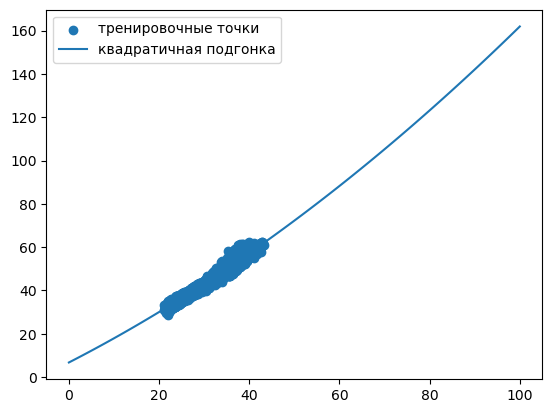

array([0.92979398, 0.91749797])

In [31]:
pr_auto = LinearRegression() # Линейная регрессия
quadratic = PolynomialFeatures(degree=2)
y_quad = quadratic.fit_transform(y_train)       # Преобразуем данные
pr_auto.fit(y_quad, X_train) # Обучаем полиномиальную регрессию
y_pr = pr.predict(quadratic.fit_transform(task)) # Предсказываем y для полиномиальной регрессии

plt.scatter(y, x, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr_auto, y_test, X_test, cv=2)

C:\Users\arufa\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


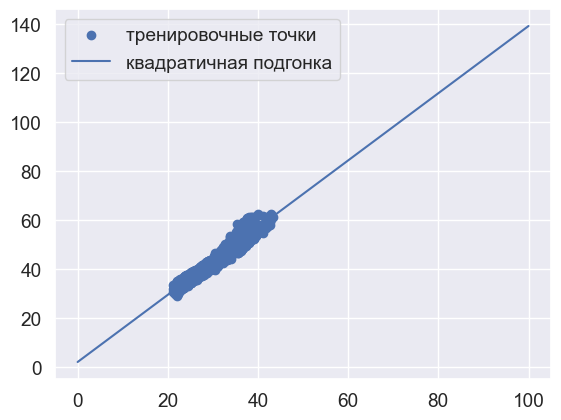

0.9279045577673499

In [55]:
lasso = MultiTaskLassoCV(cv=5, random_state=10).fit(y, x)
lasso.score(y, x)
clf = Ridge(alpha=0.5)
clf.fit(y, x)
y_pr=clf.predict(task)
plt.scatter(y, x, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
clf.score(y_test, X_test)

In [57]:
clf.predict([[24.547]])

C:\Users\arufa\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([[35.78184985]])

In [8]:
filename = '../model/K5LCV1_auto.sav'
pickle.dump(pr_auto, open(filename, 'wb'))

NameError: name 'pickle' is not defined

In [9]:
loaded_model1 = pickle.load(open("../model/K5LCV1_auto.sav", 'rb'))
#result = loaded_model.score(X_test, y_test)
cross_val_score(loaded_model, X_test, y_test, cv=100)

NameError: name 'pickle' is not defined

In [54]:
y_pr = loaded_model1.predict(quadratic.fit_transform([[28.12823863]]))
y_pr

array([[40.61032103]])